In [109]:
import numpy as np
import matplotlib.pyplot as plt

In [110]:
def rectangle(x=0, y=0, width=1, length=1, step=.1, cetner=False):
    if cetner:
        x = -1*int(width/2)
        y = -1*int(length/2)
    step_inv = int(1 / step)
    vertices = [(x, y), (x + width, y), (x + width, y + length), (x, y + length)]
    # Generate the points along the edges of the square
    points = []
    for i in range(len(vertices)):
        x1, y1 = vertices[i]    
        x2, y2 = vertices[(i + 1) % len(vertices)]
        if x1 == x2:  # Vertical edge        
            points.extend([(x1, y * step, 1) for y in range(min(y1, y2)*step_inv, max(y1, y2)*step_inv + 1, 1)])
        else:  # Horizontal edge        
            points.extend([(x * step, y1, 1) for x in range(min(x1, x2)*step_inv, max(x1, x2)*step_inv + 1, 1)])
    # Separate the x and y coordinates
    x_coords, y_coords, _ = zip(*points)
    return points, x_coords, y_coords


In [111]:
def projectivity(points, s, theta, tx, ty, v1, v2, v, K=[1,1,0,1]):
    theta = np.pi * theta / 180
    Hs = np.array([
        [s*np.cos(theta),   -s * np.sin(theta) ,        tx],
        [s*np.sin(theta),   s * np.cos(theta),          ty],
        [0,                 0,                          1]
    ])
    Ha = np.array([
        [K[0],K[1], 0],
        [K[2],K[3], 0],
        [0,   0,    1]
    ])
    Hp = np.array([
        [1 ,0,  0],
        [0 ,1,  0],
        [v1,v2, v]
    ])
    Hfinal = Hs @ Ha @ Hp
    transform_point = []
    for point in points:
        transform_point.append(Hfinal @ np.array(point).T)
        transform_point[-1] = [transform_point[-1][0]/transform_point[-1][2], transform_point[-1][1]/transform_point[-1][2], 1]
    x_coords, y_coords, _ = zip(*transform_point)
    return transform_point, x_coords, y_coords

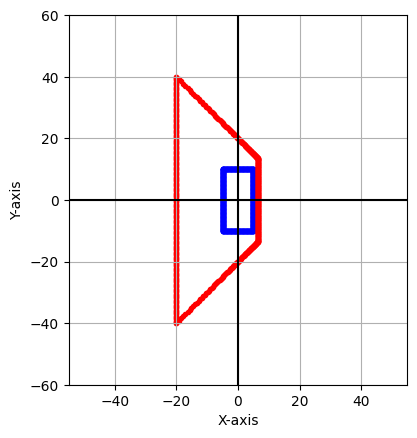

In [112]:
fig, ax = plt.subplots()


points, x_coords, y_coords = rectangle(x=1,y=2,width=10, length=20, cetner=True)
ax.scatter(x_coords, y_coords, marker='.', color='b')

points2, x_coords2, y_coords2 = projectivity(points=points, s=1, theta=0, tx=0, ty=0, v1=.05, v2=0, v=.5, K=[1, 0, 0, 1])
ax.scatter(x_coords2, y_coords2, marker='.', color='r')

# Set the axis limits
xlim = 50
ylim = 50
ax.set_xlim(min(x_coords) - xlim, max(x_coords) + xlim)
ax.set_ylim(min(y_coords) - ylim, max(y_coords) + ylim)
# Set the axis labels
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
# Display the grid
ax.grid(True)
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.set_aspect('equal', adjustable='box')
plt.show()
